# nD Truck Simulation

RIPS 2021 Aerospace Team

June 24, 2021

In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.markers
from mpl_toolkits import mplot3d
from SmartTruck import SmartTruck
from kalmanfilter2 import KalmanFilter

## Create process data and measurements
The initial position and velocity are set to 1 for all axes. We first generate the ground truth process data, and then generate the measurements from that data.

In [35]:
ds = 2 # dimensions
t = 100 # number of time steps to run
dt = 0.1 # time step length
ep_mag = 0.1 # process noise variation
ep_dir = np.array([1,1])
nu = 0.4 # measurement noise variation (both position and velocity)
initial = np.ones(ds*2)
initial.shape = (ds*2,1)

gen = SmartTruck(initial, t, dt, ep_mag, ep_dir, nu)
process = gen.process()
measure = gen.measure(process)

## Run Kalman filter and generate plots

In [54]:
output = np.empty((ds*2, 1))
zero_matrix = np.zeros((ds,ds)) # create an array of zeros for future use
filter = KalmanFilter(initial, gen.A, gen.Q, gen.R, gen.H)
prop = 0.5 # proportion of measurements lost
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (ds,1)
    if np.random.random() > prop:
        filter.predict(measure_t)
    else:
        filter.predict()
    kalman_output = filter.get_current_guess()
    output = np.append(output, kalman_output, axis=1)
output = output[:,1:] # delete the first column (initial data)

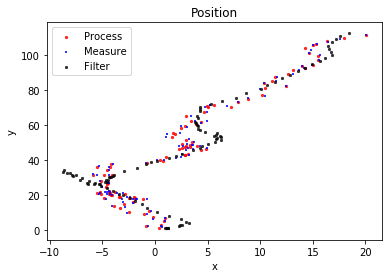

In [55]:
if ds == 2:
    %matplotlib inline
    sz = 5 # size of marker
    a = 0.8 # transparency
    plt.scatter(process[0], process[1], s=sz, alpha=a, color = 'red', marker = 'o')
    plt.scatter(measure[0], measure[1], s=sz, alpha=a, color = 'blue', marker = '+')
    plt.scatter(output[0], output[1], s=sz, alpha=a, color='black', marker = 'x')
    plt.title("Position")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Process","Measure","Filter"])

In [32]:
if ds == 3:
    #%matplotlib # plots are in a new window so they can be dragged
    ax = plt.axes(projection='3d')
    sz = 5 # size of marker
    a = 0.8 # transparency
    ax.scatter3D(process[0], process[1], process[2], s=sz, alpha=a)
    ax.scatter3D(measure[0], measure[1], measure[2], s=sz, alpha=a)
    ax.scatter3D(output[0], output[1], output[2], s=sz, alpha=a, color='black')
    plt.title("Position")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.legend(["Process","Measure","Filter"])